<a href="https://colab.research.google.com/github/john-joyce/CC-Internship/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Code for Resistance Evolution Models**

# Term list
1. death_rate (float): death rate
2. mut_rate (float): mutation rate
3. seascape_drug_conc (array-like): array of drug concentrations to be used to compute the estimated fitness seascape
4. constant_pop (bool): if true, normalizes population at each timestep to a constant population size
5. use_carrying_cap (bool): if true, attenuates growth rate as population approaches carrying cap.
6. carrying_cap (int or float): Carrying capacity
7. init_counts (array-like): array of genotype counts to initialize simulations
8. n_allele (int): number of alleles in the model system
9. n_genotype (int): number of genotypes in the model system
10. fitness_data (str): Sets how to calculate fitness.
* 'two-point': program uses IC50 and drugless growth rate to parametrize dose-response curve
* 'estimate': estimates seascape data from plate_paths
* 'random': boostraps a random seascape
11. drug_unit (str): units of drug concentration for plotting purposes
12. n_timestep (int): total number of timesteps for a simulation
13. timestep_scale (float): hours per timestep
14. passage (bool): if true, simulates passaging cells (bottleneck population every passage_time)
15. passage_time (int): frequency of cell passaging in units of timestep_scale
16. dilution (int): dilution factor for passaging
17. max_cells (int): if constant_pop is true, the population size is scaled to max_cells every timestep
18. curve_type (str): sets the type of drug concentration curve:
'pharm': one compartment pharmacokinetic curve
* 'constant'
* 'linear': linear ramp with slope set by slope attribute
* 'pulsed': simulates patient dosing
19. prob_drop (float): for simulating patient nonadherence. Probability of forgetting to take an individual dose
20. k_elim (float): elimination rate for 1-compartment pharmacokinetic model
21. k_abs (float):  absorption rate for 1-compartment pharmacokinetic model.
22. dose_schedule (int): hours between doses. Defaults to 24.



## Initialization

In [3]:
!pip install git+https://github.com/eshanking/fears/

  Cloning https://github.com/eshanking/fears/ to /tmp/pip-req-build-vvlfud36
  Running command git clone --filter=blob:none --quiet https://github.com/eshanking/fears/ /tmp/pip-req-build-vvlfud36
  Resolved https://github.com/eshanking/fears/ to commit 449545ad17680ebe6a5ba4e657e8ddaa9ce89e23
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 12.5 MB/s eta 0:00:00
  Created wheel for fears: filename=fears-0.1.0-py3-none-any.whl size=77836 sha256=ca92ac9ddb8d108f8d6cf7d5b2f6ab3ced9e3bc98d64d4c3c86f5b69eadac5b1
  Stored in directory: /tmp/pip-ephem-wheel-cache-i8678pvs/wheels/26/02/2d/d623fa89125e0d7dbf957445cf872c6f6a4da65a6386d56e07
  Created wheel for autograd-gamma: filename=autog

In [4]:
from fears.population import Population
from fears.utils import plotter
import numpy as np
import matplotlib.pyplot as plt

## No drug

## Standard Schedule

(array([[1.0000e+04, 1.0000e+01, 1.0000e+01, 1.0000e+01],
        [1.0965e+04, 1.0000e+01, 1.0000e+01, 1.1000e+01],
        [1.0986e+04, 1.0000e+01, 1.0000e+01, 1.1000e+01],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]),
 [999])

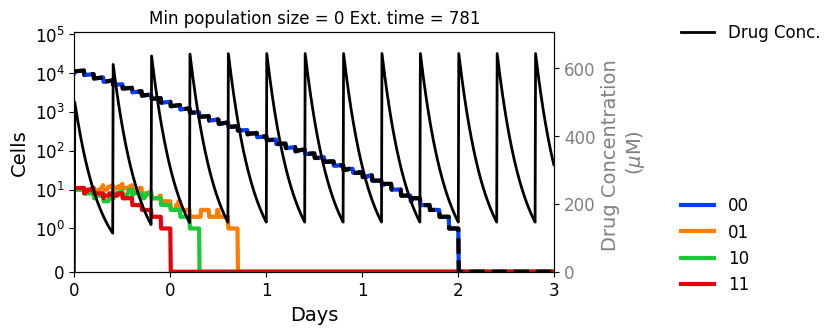

In [6]:
p = Population(fitness_data = 'from_file',
               plot_pop_size = True,
               init_counts = [10000, 10, 10, 10],
               max_dose = 500,
               dwell= False,
               dwell_time = 1,
               prob_drop = 0,
               k_elim = .25,
               k_abs = 100,
               death_model = False,
               curve_type = 'pulsed',
               death_rate = 0,
               timestep_scale = 0.075,
               n_timestep = 1000,
               n_sims = 1,
               n_allele = 2,
               seascape_path = 'seascape.csv',
               mut_rate = 10e-9,
               passage = True,
               dilution = 1.3,
               passage_time = 0.5,
               dose_schedule = 6)

p.simulate()

## Drop Dose Schedule

<class 'numpy.ndarray'>


(array([[1.0000e+04, 1.0000e+01, 1.0000e+01, 1.0000e+01],
        [1.1002e+04, 1.0000e+01, 1.1000e+01, 1.3000e+01],
        [1.1025e+04, 1.0000e+01, 1.1000e+01, 1.3000e+01],
        ...,
        [0.0000e+00, 1.5300e+02, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.5300e+02, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.5500e+02, 0.0000e+00, 0.0000e+00]]),
 [999])

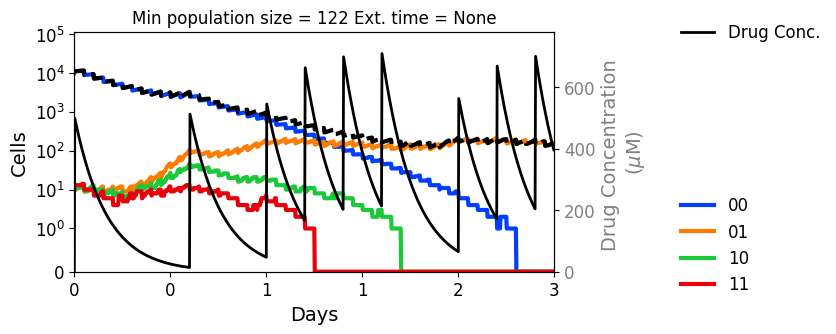

In [ ]:
p = Population(fitness_data = 'from_file',
               plot_pop_size = True,
               init_counts = [10000, 10, 10, 10],
               max_dose = 500,
               dwell= False,
               dwell_time = 1,
               prob_drop = 0.2,
               k_elim = .25,
               k_abs = 100,
               death_model = False,
               curve_type = 'pulsed',
               death_rate = 0,
               timestep_scale = 0.075,
               n_timestep = 1000,
               n_sims = 1,
               n_allele = 2,
               seascape_path = 'seascape.csv',
               mut_rate = 10e-9,
               passage = True,
               dilution = 1.3,
               passage_time = 0.5,
               dose_schedule = 6)

p.simulate()